In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px

In [132]:
df = pd.read_csv(r"D:\data collection\Metro_Interstate_Traffic_Volume.csv\Metro_Interstate_Traffic_Volume.csv")

In [133]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### Data Dictionary

- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [134]:
print('max_time:  ' +df.date_time.max())
print('min_time:  ' +df.date_time.min())

max_time:  2018-09-30 23:00:00
min_time:  2012-10-02 09:00:00


In [135]:
df["holiday"].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [136]:
df["date_time"] = pd.to_datetime(df["date_time"], 
 format = "%Y-%m-%d %H:%M:%S", 
 errors = "coerce")

In [137]:
df["date_time_year"] = df["date_time"].dt.year
df["date_time_month"] = df["date_time"].dt.month
df["date_time_week"] = df["date_time"].dt.week
df["date_time_day"] = df["date_time"].dt.day
df["date_time_hour"] = df["date_time"].dt.hour
df["date_time_min"] = df["date_time"].dt.minute
df["date_time_dayofweek"] = df["date_time"].dt.dayofweek

C:\Users\DELL\AppData\Local\Temp\ipykernel_13836\4222008826.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["date_time_week"] = df["date_time"].dt.week


In [138]:
# Dropping Date_time column
df = df.drop(["date_time"],axis=1)

In [139]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date_time_year,date_time_month,date_time_week,date_time_day,date_time_hour,date_time_min,date_time_dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,40,2,9,0,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,40,2,10,0,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,40,2,11,0,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,40,2,12,0,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,40,2,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,2018,9,39,30,19,0,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,2018,9,39,30,20,0,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,2018,9,39,30,21,0,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,2018,9,39,30,22,0,6


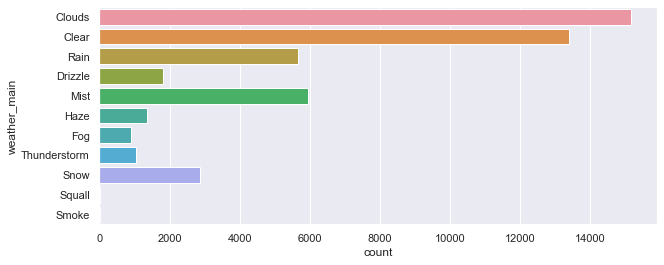

In [140]:
#exploring different categories in weather_main
plt.figure(figsize=(10,4))
sns.countplot(y='weather_main', data=df)
plt.show()

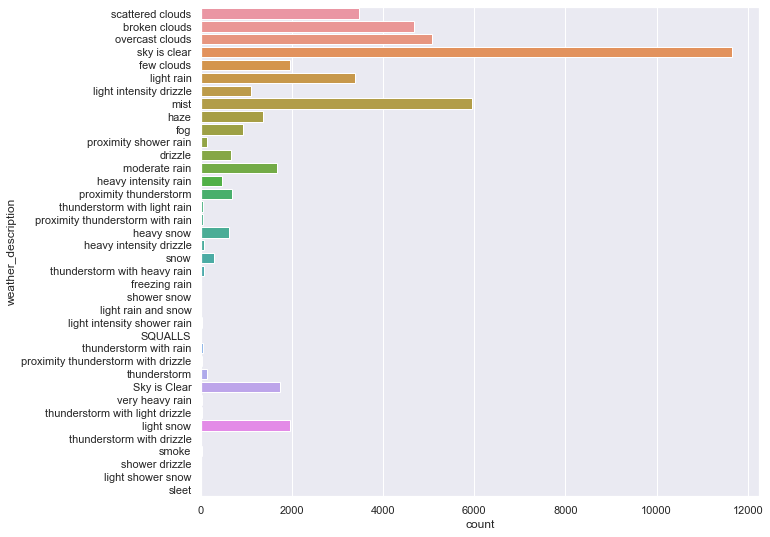

In [141]:
#Exploring the different categories in weather_description
plt.figure(figsize=(10,9))
sns.countplot(y='weather_description', data=df)
plt.show()

## Bivariate Analysis
Exploring relationship between traffic and other features

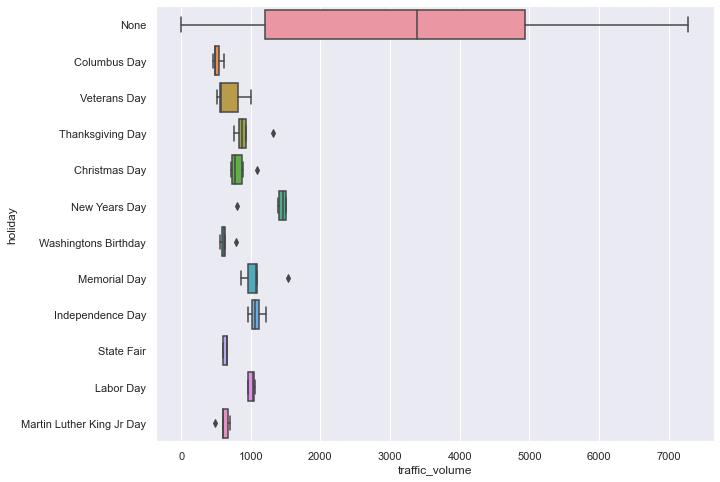

In [142]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = df)
plt.show()

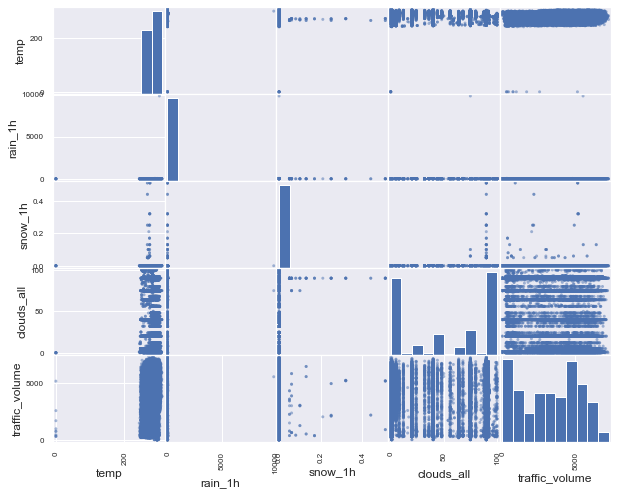

In [143]:
# Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(df[num_vars],figsize=(10,8))
plt.show()

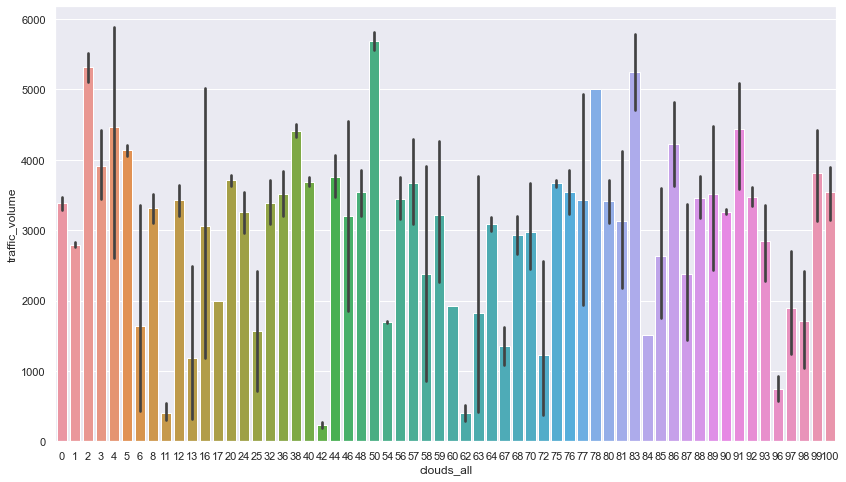

In [144]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df)
plt.show()

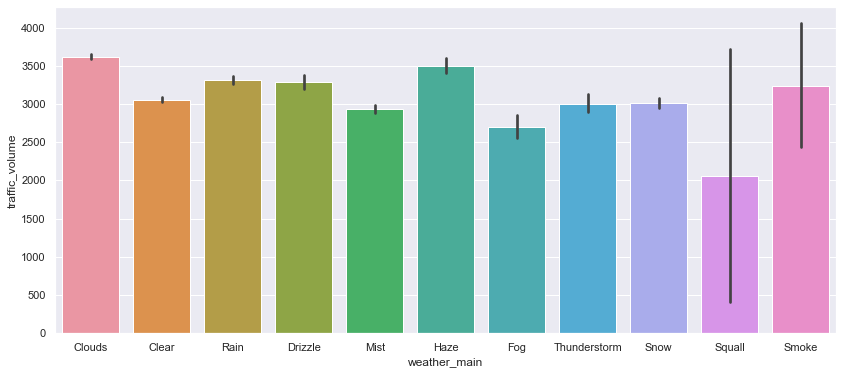

In [145]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(14,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df)
plt.show()

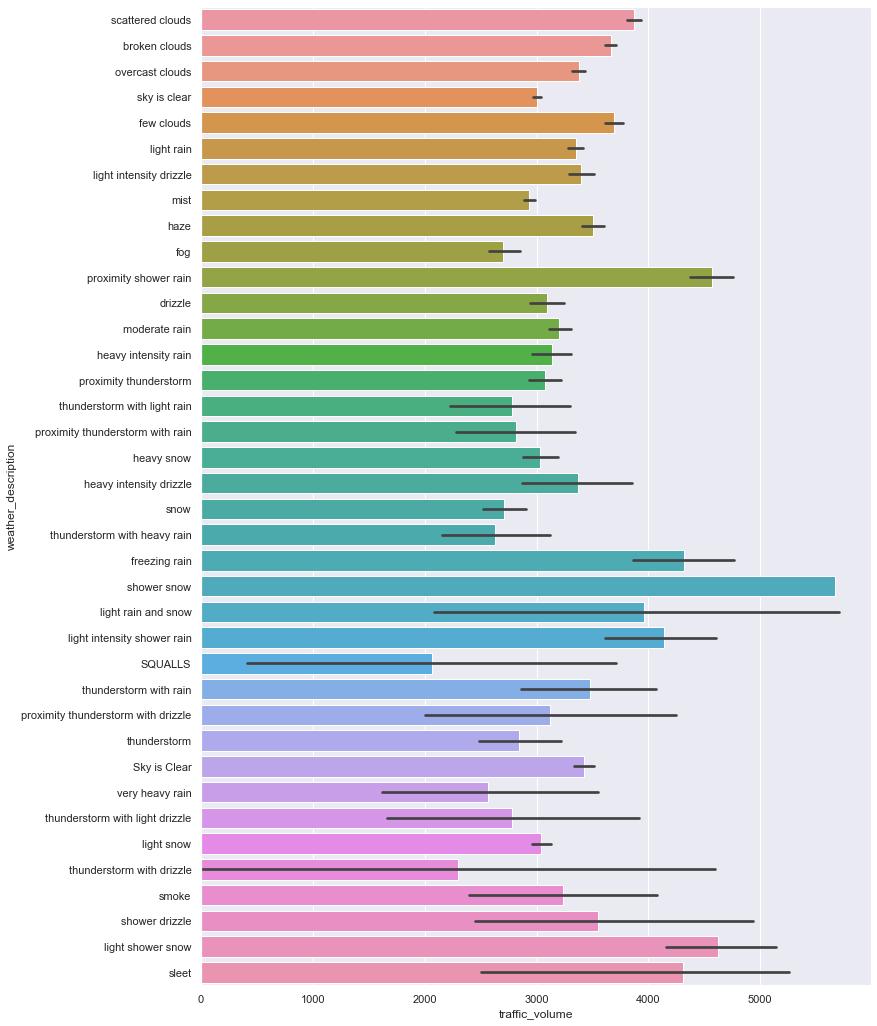

In [146]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,18))
sns.barplot(y='weather_description', x = 'traffic_volume', data = df)
plt.show()

In [147]:
des = df["weather_description"].value_counts().to_dict()
des

{'sky is clear': 11665,
 'mist': 5950,
 'overcast clouds': 5081,
 'broken clouds': 4666,
 'scattered clouds': 3461,
 'light rain': 3372,
 'few clouds': 1956,
 'light snow': 1946,
 'Sky is Clear': 1726,
 'moderate rain': 1664,
 'haze': 1360,
 'light intensity drizzle': 1100,
 'fog': 912,
 'proximity thunderstorm': 673,
 'drizzle': 651,
 'heavy snow': 616,
 'heavy intensity rain': 467,
 'snow': 293,
 'proximity shower rain': 136,
 'thunderstorm': 125,
 'heavy intensity drizzle': 64,
 'thunderstorm with heavy rain': 63,
 'thunderstorm with light rain': 54,
 'proximity thunderstorm with rain': 52,
 'thunderstorm with rain': 37,
 'smoke': 20,
 'very heavy rain': 18,
 'thunderstorm with light drizzle': 15,
 'light intensity shower rain': 13,
 'proximity thunderstorm with drizzle': 13,
 'light shower snow': 11,
 'light rain and snow': 6,
 'shower drizzle': 6,
 'SQUALLS': 4,
 'sleet': 3,
 'thunderstorm with drizzle': 2,
 'freezing rain': 2,
 'shower snow': 1}

In [148]:
des1 = {'sky is clear': 11665,
 'mist': 5950,
 'overcast clouds': 5081,
 'broken clouds': 4666,
 'scattered clouds': 3461,
 'light rain': 3372,
 'few clouds': 1956,
 'light snow': 1946,
 'Sky is Clear': 11665,
 'moderate rain': 1664,
 'haze': 1360,
 'light intensity drizzle': 1100,
 'fog': 912,
 'proximity thunderstorm': 673,
 'drizzle': 651,
 'heavy snow': 616,
 'heavy intensity rain': 467,
 'snow': 293,
 'proximity shower rain': 136,
 'thunderstorm': 125,
 'heavy intensity drizzle': 64,
 'thunderstorm with heavy rain': 63,
 'thunderstorm with light rain': 54,
 'proximity thunderstorm with rain': 52,
 'thunderstorm with rain': 37,
 'smoke': 20,
 'very heavy rain': 18,
 'thunderstorm with light drizzle': 15,
 'light intensity shower rain': 13,
 'proximity thunderstorm with drizzle': 12,
 'light shower snow': 11,
 'light rain and snow': 6,
 'shower drizzle': 5,
 'SQUALLS': 4,
 'sleet': 3,
 'thunderstorm with drizzle': 7,
 'freezing rain': 2,
 'shower snow': 1}

df["weather_description"] = df["weather_description"].map(des1)

In [149]:
main = df["weather_main"].value_counts().to_dict()
main

{'Clouds': 15164,
 'Clear': 13391,
 'Mist': 5950,
 'Rain': 5672,
 'Snow': 2876,
 'Drizzle': 1821,
 'Haze': 1360,
 'Thunderstorm': 1034,
 'Fog': 912,
 'Smoke': 20,
 'Squall': 4}

In [150]:
df["weather_main"] = df["weather_main"].map(main)

In [151]:
main1 = df["holiday"].value_counts().to_dict()
main1

{'None': 48143,
 'Labor Day': 7,
 'Thanksgiving Day': 6,
 'Christmas Day': 6,
 'New Years Day': 6,
 'Martin Luther King Jr Day': 6,
 'Columbus Day': 5,
 'Veterans Day': 5,
 'Washingtons Birthday': 5,
 'Memorial Day': 5,
 'Independence Day': 5,
 'State Fair': 5}

In [152]:
main2 = {'State Fair': 1,
 'Labor Day': 2,
 'Thanksgiving Day': 3,
 'Christmas Day': 4,
 'New Years Day': 5,
 'Martin Luther King Jr Day': 6,
 'Columbus Day': 7,
 'Veterans Day': 8,
 'Washingtons Birthday': 9,
 'Memorial Day': 10,
 'Independence Day': 11,
 'None': 12}

df["holiday"] = df["holiday"].map(main2)

In [153]:
df = df.drop(["date_time_min"],axis=1)

In [154]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date_time_year,date_time_month,date_time_week,date_time_day,date_time_hour,date_time_dayofweek
0,12,288.28,0.0,0.0,40,15164,3461,5545,2012,10,40,2,9,1
1,12,289.36,0.0,0.0,75,15164,4666,4516,2012,10,40,2,10,1
2,12,289.58,0.0,0.0,90,15164,5081,4767,2012,10,40,2,11,1
3,12,290.13,0.0,0.0,90,15164,5081,5026,2012,10,40,2,12,1
4,12,291.14,0.0,0.0,75,15164,4666,4918,2012,10,40,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,12,283.45,0.0,0.0,75,15164,4666,3543,2018,9,39,30,19,6
48200,12,282.76,0.0,0.0,90,15164,5081,2781,2018,9,39,30,20,6
48201,12,282.73,0.0,0.0,90,1034,673,2159,2018,9,39,30,21,6
48202,12,282.09,0.0,0.0,90,15164,5081,1450,2018,9,39,30,22,6


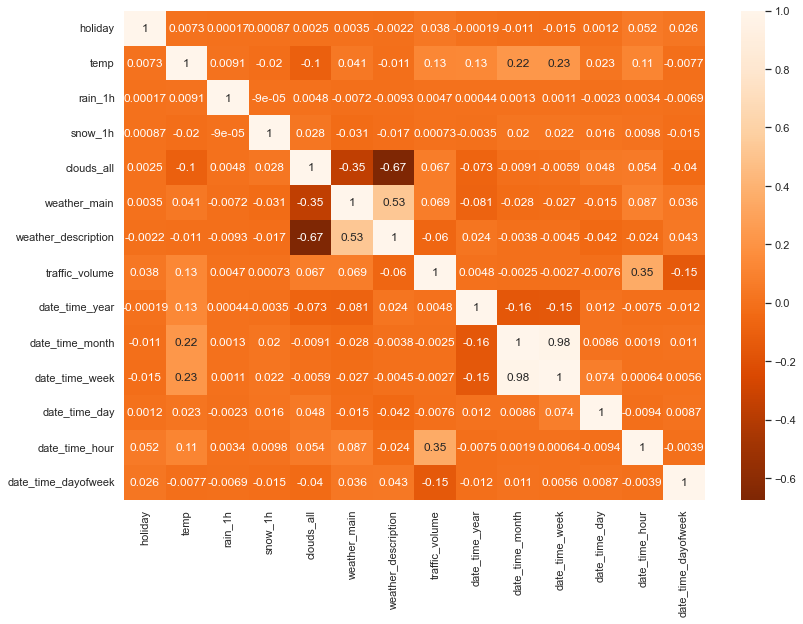

In [155]:
sns.set(rc = {"figure.figsize":(13,9)})
sns.heatmap(df.corr(), annot=True , cmap='Oranges_r')
plt.show()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int64  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  int64  
 6   weather_description  48204 non-null  int64  
 7   traffic_volume       48204 non-null  int64  
 8   date_time_year       48204 non-null  int64  
 9   date_time_month      48204 non-null  int64  
 10  date_time_week       48204 non-null  int64  
 11  date_time_day        48204 non-null  int64  
 12  date_time_hour       48204 non-null  int64  
 13  date_time_dayofweek  48204 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 5.1 MB


In [157]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date_time_year,date_time_month,date_time_week,date_time_day,date_time_hour,date_time_dayofweek
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,11.992117,281.205870,0.334264,0.000222,49.362231,10210.318521,5776.064912,3259.818355,2015.512426,6.506037,26.487449,15.737636,11.398162,2.984980
std,0.247679,13.338232,44.789133,0.008168,39.015750,5173.596483,3976.290952,1986.860670,1.893211,3.400221,14.842452,8.722938,6.940238,2.005941
min,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,2012.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,272.160000,0.000000,0.000000,1.000000,5672.000000,1956.000000,1193.000000,2014.000000,4.000000,14.000000,8.000000,5.000000,1.000000
50%,12.000000,282.450000,0.000000,0.000000,64.000000,13391.000000,5081.000000,3380.000000,2016.000000,7.000000,27.000000,16.000000,11.000000,3.000000
75%,12.000000,291.806000,0.000000,0.000000,90.000000,15164.000000,11665.000000,4933.000000,2017.000000,9.000000,39.000000,23.000000,17.000000,5.000000
max,12.000000,310.070000,9831.300000,0.510000,100.000000,15164.000000,11665.000000,7280.000000,2018.000000,12.000000,53.000000,31.000000,23.000000,6.000000


In [158]:
df1 = df[0:47000]
df2 = df[47000:]

In [159]:
#split data into X and y
X = df1.drop("traffic_volume" , axis=1)

y = df1["traffic_volume"]

In [160]:
#split data into A and b for final checking after test data
A = df2.drop("traffic_volume" , axis=1)

b = df2["traffic_volume"]

In [161]:
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time_year,date_time_month,date_time_week,date_time_day,date_time_hour,date_time_dayofweek
0,12,288.28,0.00,0.0,40,15164,3461,2012,10,40,2,9,1
1,12,289.36,0.00,0.0,75,15164,4666,2012,10,40,2,10,1
2,12,289.58,0.00,0.0,90,15164,5081,2012,10,40,2,11,1
3,12,290.13,0.00,0.0,90,15164,5081,2012,10,40,2,12,1
4,12,291.14,0.00,0.0,75,15164,4666,2012,10,40,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,12,291.78,5.84,0.0,90,1034,15,2018,8,34,24,12,4
46996,12,291.78,5.84,0.0,90,5950,5950,2018,8,34,24,12,4
46997,12,292.09,2.76,0.0,90,5672,1664,2018,8,34,24,13,4
46998,12,292.09,2.76,0.0,90,1034,673,2018,8,34,24,13,4


## RandomForestRegressor

In [162]:
# Models from Scikit-Learn
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [163]:
np.random.seed(42)

#split data into train & test 
X_train ,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.25)

In [164]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0 )
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=0)

In [165]:
regressor.score(X_test, y_test)

0.9678864711785282

In [166]:
regressor.score(A, b)

0.9615584311262919

## XG Boost

In [167]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [168]:
xgb.score(X_test, y_test)

0.9723023774951659

In [169]:
xgb.score(A, b)

0.967263187324853

## Voting Regressor

In [170]:
from sklearn.ensemble import VotingRegressor

regressors = [ ('Random Forest', regressor),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.45, 0.55))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=0)),
                            ('XgBoost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...))],
                n_jobs=-1, verbose=1, weights=(0.45, 0.55))

In [171]:
vr.score(X_test, y_test)

0.9737891460570766

In [172]:
vr.score(A,b)

0.9684691868024683

## Evaluation Matrix

In [173]:
y_preds = vr.predict(X_test)

In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_preds)
print(r2)

0.9737891460570766


In [175]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

188.15467704308247

In [176]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

103826.57754886715

## Result

In [177]:
print(f"r2_score is {round(r2*100,2)}")
print(f"Mean absolute error is {round(mae,2)}")
print(f"Mean squared error is {round(mse,2)}")
print("RMSE",round(np.log(np.sqrt(mean_squared_error(y_test,y_preds))),2))

r2_score is 97.38
Mean absolute error is 188.15
Mean squared error is 103826.58
RMSE 5.78


In [179]:
import pickle
filename = 'metro.pkl'
pickle.dump(vr, open(filename, 'wb'))